Importing Libraries

In [80]:
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read the data

In [158]:
data = pd.read_csv("Data/SPX/SPX_final_data.csv", index_col=0, parse_dates=True)
data = data.loc['2016':]
data.head()

,rv5,return
2016-01-04,0.018644,-0.015121
2016-01-05,0.007912,0.001960
2016-01-06,0.014094,-0.013133
2016-01-07,0.019777,-0.024133
2016-01-08,0.013277,-0.011079


In [159]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Data/Indicators/ADS Index.csv', sep=';', index_col=0)

# Rename the column
df.columns = ['ADS']

# Convert the index to datetime
df.index = pd.to_datetime(df.index, format='%Y:%m:%d')

# Assuming 'data' is your other DataFrame and both 'data' and 'df' have a common column for merging
data = data.merge(df, left_index=True, right_index=True, how='inner')
# Print the DataFrame
data.head()

,rv5,return,ADS
2016-01-04,0.018644,-0.015121,-0.294595
2016-01-05,0.007912,0.001960,-0.279636
2016-01-06,0.014094,-0.013133,-0.265093
2016-01-07,0.019777,-0.024133,-0.250960
2016-01-08,0.013277,-0.011079,-0.237233


In [160]:
df = pd.read_csv('Data/Indicators/Economic Policy Index.csv', index_col=0)

df.index = pd.to_datetime(df.index)

data = data.merge(df, left_index=True, right_index=True, how='inner')

data.head()

,rv5,return,ADS,USEPUINDXD
2016-01-04,0.018644,-0.015121,-0.294595,106.94
2016-01-05,0.007912,0.001960,-0.279636,52.80
2016-01-06,0.014094,-0.013133,-0.265093,30.40
2016-01-07,0.019777,-0.024133,-0.250960,56.40
2016-01-08,0.013277,-0.011079,-0.237233,62.21


In [161]:
import yfinance as yf
import pandas as pd

ticker_names = ['^IRX', '^FVX', '^TYX', '^VIX', 'DX-Y.NYB']
symbol_names = ['13wb', '5yt', '30yt', 'VIX', 'Dollar_index']

for ticker, symbol in zip(ticker_names, symbol_names):
    # Download the data
    data_yahoo = yf.download(ticker, start='2000-01-01', end='2024-12-31')

    # Convert the index to datetime
    data_yahoo.index = pd.to_datetime(data_yahoo.index)
    
    data_yahoo = data_yahoo[['Close']]

    # Rename the column
    data_yahoo.columns = [symbol]

    # Merge the data with your existing dataframe
    data = data.merge(data_yahoo, left_index=True, right_index=True, how='inner')

data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,rv5,return,ADS,USEPUINDXD,13wb,5yt,30yt,VIX,Dollar_index
2016-01-04,0.018644,-0.015121,-0.294595,106.94,0.155,1.735,2.990,20.700001,98.870003
2016-01-05,0.007912,0.001960,-0.279636,52.80,0.205,1.724,3.011,19.340000,99.400002
2016-01-06,0.014094,-0.013133,-0.265093,30.40,0.205,1.650,2.940,20.590000,99.180000
2016-01-07,0.019777,-0.024133,-0.250960,56.40,0.190,1.612,2.926,24.990000,98.220001
2016-01-08,0.013277,-0.011079,-0.237233,62.21,0.190,1.578,2.920,27.010000,98.540001


In [162]:
data['13wb_return'] = np.log(data['13wb'] / data['13wb'].shift(1))
data.dropna(inplace=True)

In [163]:
data['credit_spread'] = data['30yt'] - data['13wb']

In [164]:
data.drop(['13wb', '5yt', '30yt'], axis = 1, inplace = True)

In [165]:
data['dollar_index_return'] = np.log(data['Dollar_index'] / data['Dollar_index'].shift(1))
data.drop(['Dollar_index'], axis=1, inplace=True)
data.dropna(inplace=True)

In [166]:
data_yahoo = yf.download('^SPX', start='2000-01-01', end='2024-12-31')

# Convert the index to datetime
data_yahoo.index = pd.to_datetime(data_yahoo.index)

data_yahoo = data_yahoo[['Volume']]


data = data.merge(data_yahoo, left_index=True, right_index=True, how='inner')

data.head()

[*********************100%%**********************]  1 of 1 completed


,rv5,return,ADS,USEPUINDXD,VIX,13wb_return,credit_spread,dollar_index_return,Volume
2016-01-06,0.014094,-0.013133,-0.265093,30.40,20.590000,0.000000,2.735,-0.002216,4336660000
2016-01-07,0.019777,-0.024133,-0.250960,56.40,24.990000,-0.075986,2.736,-0.009727,5076590000
2016-01-08,0.013277,-0.011079,-0.237233,62.21,27.010000,0.000000,2.730,0.003253,4664940000
2016-01-11,0.012732,0.000874,-0.198630,65.10,24.299999,-0.082238,2.781,0.001926,4607290000
2016-01-12,0.013360,0.007985,-0.186875,67.32,22.469999,0.182322,2.672,0.002428,4887260000


In [167]:
test_data = data.iloc[-int(len(data) * 0.1):]
data = data.iloc[:-int(len(data) * 0.1)]

GARCH

In [13]:
daily_data = data[['return', 'rv5']]


Test 1: Stationarity Test (Augmented Dickey-Fuller Test) on returns. If the p-value is less than a chosen significance level (commonly 0.05), you reject the null hypothesis of a unit root, indicating that the time series is stationary.

In [14]:
stationarity_test(daily_data['return'])

ADF Statistic: -13.686944
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Test 2: Autocorrelation with Ljung-Box Test. If the p-value is less than a chosen significance level (commonly 0.05), you reject the null hypothesis that there is no autocorrelation. This suggests that there is significant autocorrelation in the series.

In [15]:
Ljung_Box_Test(daily_data['return'], 15)

,lb_stat,lb_pvalue
1,33.606321,6.747309e-09
2,51.174093,7.721236e-12
3,53.589881,1.372383e-11
4,56.823968,1.346965e-11
5,58.662058,2.296495e-11
6,61.382859,2.355957e-11
7,61.427619,7.825717e-11
8,61.473796,2.393292e-10
9,73.335092,3.365902e-12
10,78.753168,8.808937e-13


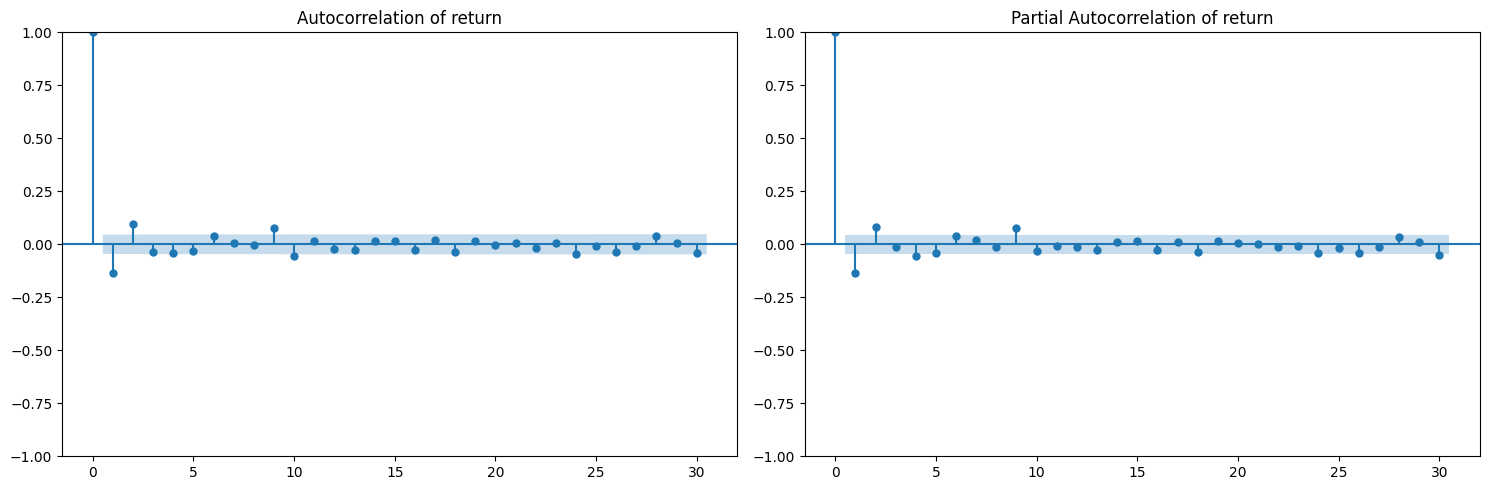

In [16]:
plot_autocorrelations(['return'], [daily_data['return']])


Since the returns are clearly not autocorrelated, we would use Y_t = mu + epsilon_t and we see later that the mu ~= 0

In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Assuming 'data' is your DataFrame and 'returns' is the column you want to model
returns = daily_data[['return']]

# Define the range of values for p, d and q
p_values = range(0, 3)
d_values = range(0, 1)
q_values = range(0, 3)

# Initialize variables to store the best results
best_aic = np.inf
best_bic = np.inf
best_order_aic = None
best_order_bic = None

# Iterate over all combinations of p, d and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            # Fit the ARIMA model
            model = ARIMA(returns, order=(p, d, q))
            result = model.fit()

            # Update the best AIC model
            if result.aic < best_aic:
                best_aic = result.aic
                best_order_aic = (p, d, q)

            # Update the best BIC model
            if result.bic < best_bic:
                best_bic = result.bic
                best_order_bic = (p, d, q)
# Print the best models
print(f"Best AIC model: ARIMA{best_order_aic} with AIC={best_aic}")
print(f"Best BIC model: ARIMA{best_order_bic} with BIC={best_bic}")

Best AIC model: ARIMA(2, 0, 0) with AIC=-11329.411578399591
Best BIC model: ARIMA(2, 0, 0) with BIC=-11307.261858253245


In [49]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Assuming 'data' is your DataFrame and 'returns' is the column you want to model
returns = daily_data['return']

# Fit an ARIMA model
arima_model = ARIMA(returns, order=(2, 0, 0))  # Adjust the order parameters as needed
arima_result = arima_model.fit()

# Get the residuals from the ARIMA model
daily_data['ARIMA_res'] = arima_result.resid


We don't have autocorrelation in the first few lags.

In [50]:
Ljung_Box_Test(daily_data['ARIMA_res'], 15)

,lb_stat,lb_pvalue
1,0.011304,0.915328
2,0.025286,0.987437
3,0.603283,0.895680
4,7.907523,0.095025
5,9.669186,0.085170
6,12.763355,0.046952
7,12.810719,0.076857
8,12.878326,0.116105
9,23.346709,0.005463
10,26.776752,0.002825


In [51]:
Ljung_Box_Test(daily_data['ARIMA_res'] ** 2, 15)

,lb_stat,lb_pvalue
1,310.283164,1.894695e-69
2,765.879689,4.912909e-167
3,1030.635609,4.066628e-223
4,1168.392167,1.132834e-251
5,1612.528929,0.000000e+00
6,1733.541124,0.000000e+00
7,1961.243833,0.000000e+00
8,2104.144003,0.000000e+00
9,2179.311696,0.000000e+00
10,2349.854385,0.000000e+00


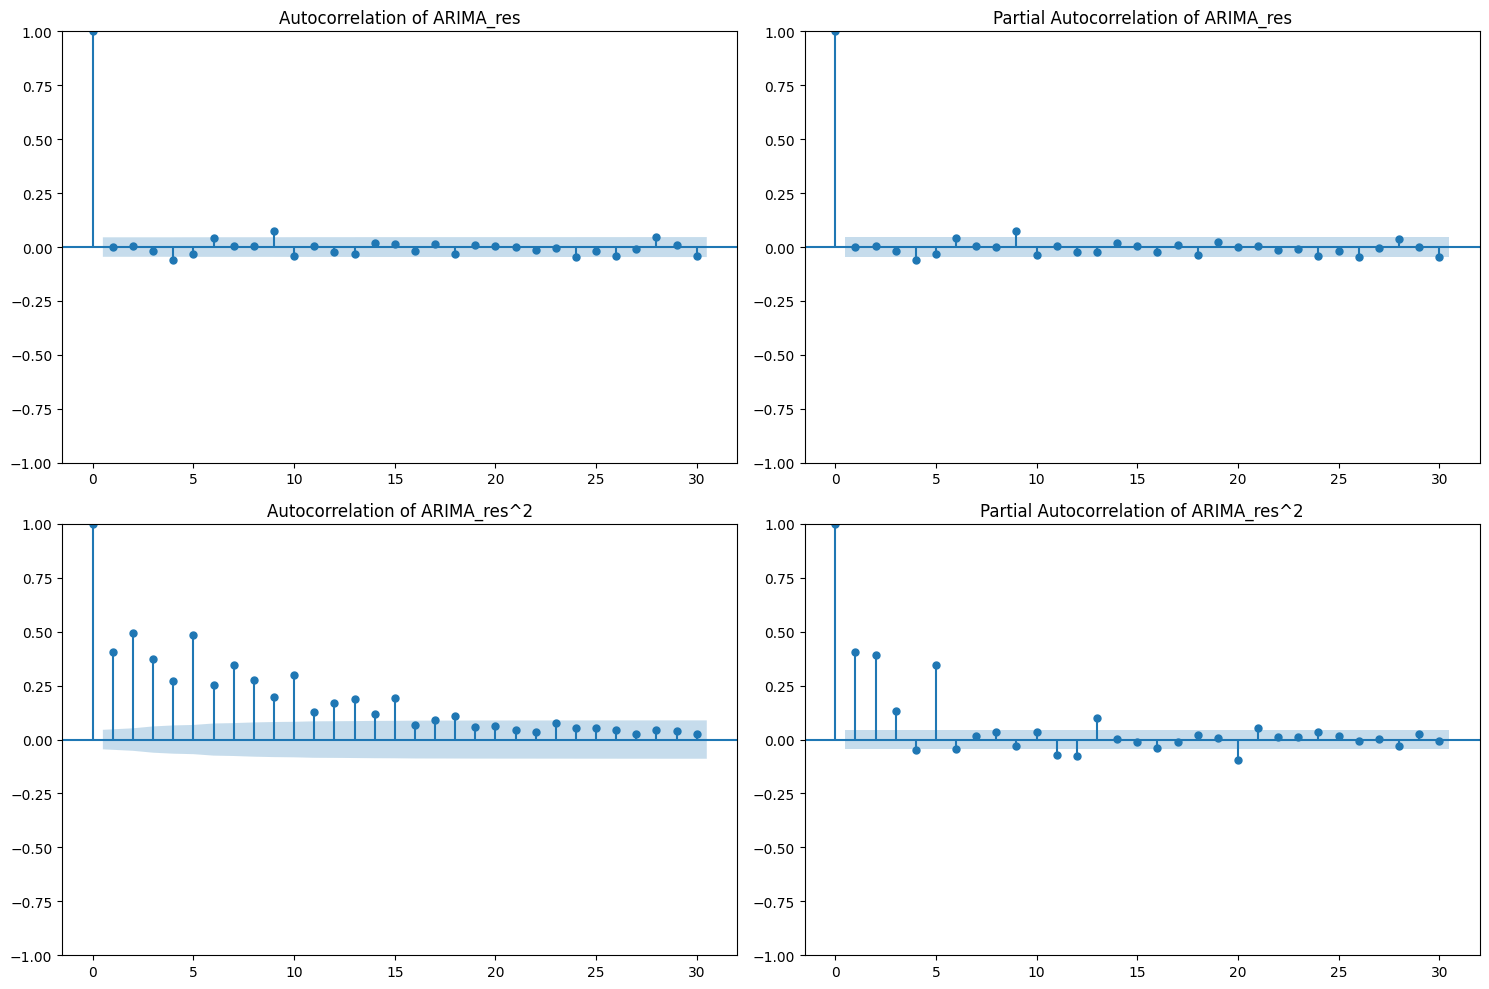

In [52]:
plot_autocorrelations(['ARIMA_res', 'ARIMA_res^2'], [daily_data['ARIMA_res'], daily_data['ARIMA_res'] ** 2])

GARCH Model

In [53]:
import importlib
import vol_models

importlib.reload(vol_models)
from vol_models import GARCHModel

Hyperparameter search. We don't use log likelihood because it doesn't take into account the number of parameters in the model. We use AIC and BIC instead.

In [55]:
import numpy as np
from arch import arch_model

# Assuming 'daily_data' is your DataFrame and 'residuals' is the column you want to model
# Define the range of values for p and q
p_values = range(1, 7)
q_values = range(1, 7)

# Define the distributions
distributions = ['normal', 't', 'skewt']

# Initialize variables to store the best results
best_bic = np.inf
best_aic = np.inf
best_model_bic = None
best_model_aic = None

# Iterate over all combinations of p, q, and distribution
for dist in distributions:
    for p in p_values:
        for q in q_values:
            # Fit the GARCH model
            garch_model = GARCHModel(p,q, dist = dist)
            garch_model.fit_garch_model(daily_data['ARIMA_res'] * 100, disp = 'off')
            # Get BIC, AIC
            bic = garch_model.result.bic
            aic = garch_model.result.aic

            # Update the best BIC model
            if bic < best_bic:
                best_bic = bic
                best_model_bic = [p,q]

            # Update the best AIC model
            if aic < best_aic:
                best_aic = aic
                best_model_aic = [p,q]


    # Print the best models
    print(f"Best BIC model for {dist}:", best_model_bic)
    print(f"Best AIC model for {dist}:", best_model_aic)

Best BIC model for normal: [1, 1]
Best AIC model for normal: [1, 1]
Best BIC model for t: [1, 1]
Best AIC model for t: [1, 1]
Best BIC model for skewt: [1, 1]
Best AIC model for skewt: [1, 1]


In [56]:
import numpy as np
from arch import arch_model

# Define the distributions
distributions = ['normal', 't', 'skewt']

# Initialize variables to store the best results
best_bic = np.inf
best_aic = np.inf
best_dist_bic = None
best_dist_aic = None

# Iterate over all distributions
for dist in distributions:
    # Fit the GARCH model
    garch_model = GARCHModel(1,1, dist = dist)
    garch_model.fit_garch_model(daily_data['ARIMA_res'] * 100, disp = 'off')
    # Get BIC, AIC, and log-likelihood
    bic = garch_model.result.bic
    aic = garch_model.result.aic

    # Update the best BIC distribution
    if bic < best_bic:
        best_bic = bic
        best_dist_bic = dist

    # Update the best AIC distribution
    if aic < best_aic:
        best_aic = aic
        best_dist_aic = dist


# Print the best distributions
print(f"Best BIC distribution: {best_dist_bic}")
print(f"Best AIC distribution: {best_dist_aic}")

Best BIC distribution: skewt
Best AIC distribution: skewt


Until here we decide that the best distribution is the t distribution

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10409.334377570074
Iteration:      2,   Func. Count:     17,   Neg. LLF: 33544.95332347962
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2422.9639625214036
Iteration:      4,   Func. Count:     31,   Neg. LLF: 39854.00402090568
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2396.0322499460053
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2395.5904072917783
Iteration:      7,   Func. Count:     51,   Neg. LLF: 3479.2031021869834
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2400.82110702731
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2395.3704718316276
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2395.3647478091634
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2395.364696233033
Iteration:     12,   Func. Count:     83,   Neg. LLF: 2395.364696233015
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2395.364696233033
            Iterations

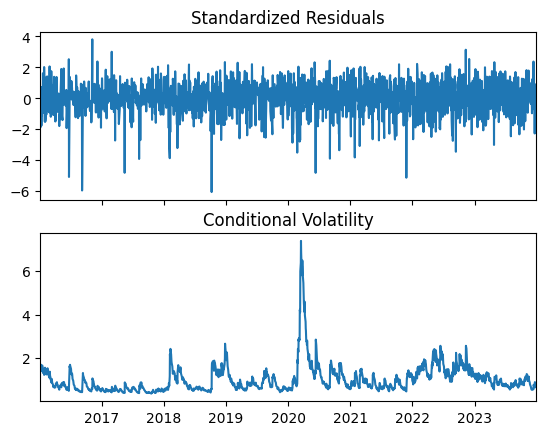

In [57]:
garch_1_1_t = GARCHModel(1,1, dist = 'skewt')
garch_1_1_t.fit_garch_model(daily_data['ARIMA_res'] * 100)
garch_1_1_t.plot_results()

Tesing for autocorrelation of standardized residuals. Residuals are i.i.d : There should be no autocorrelation in the residuals


In [58]:
std_resid = garch_1_1_t.resid / garch_1_1_t.conditional_volatility
Ljung_Box_Test(std_resid, 15)

,lb_stat,lb_pvalue
1,13.757691,0.000208
2,16.335818,0.000284
3,16.727199,0.000804
4,17.884164,0.001300
5,19.069302,0.001866
6,19.728470,0.003095
7,21.042291,0.003708
8,21.262120,0.006483
9,21.316913,0.011315
10,21.759532,0.016378


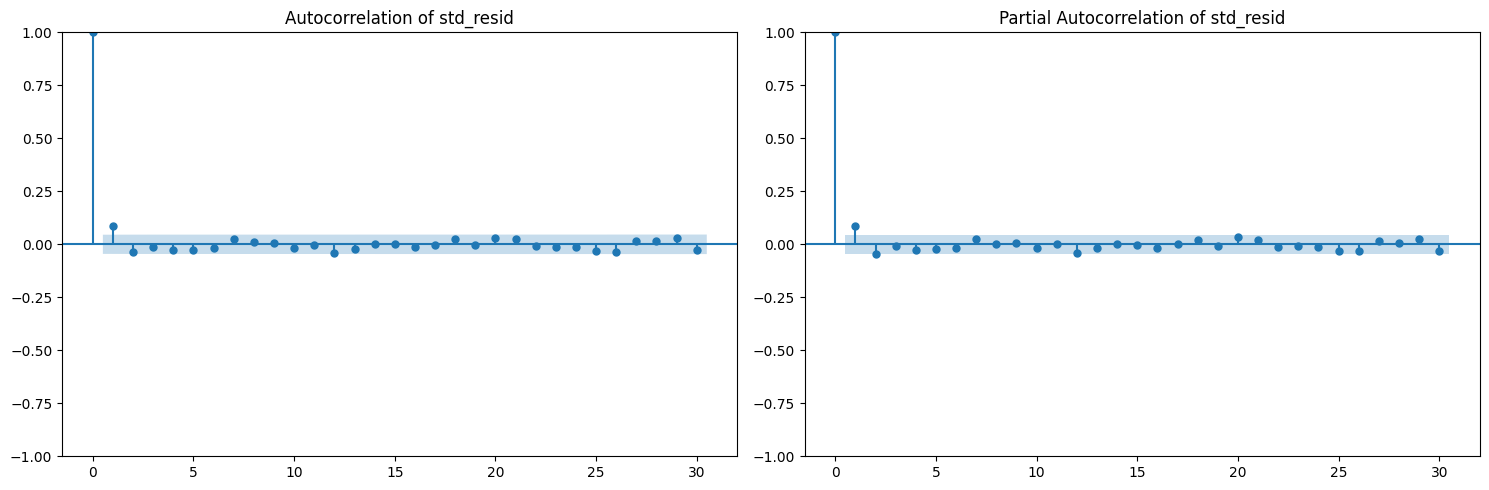

In [59]:
plot_autocorrelations(['std_resid'], [std_resid])

Arch effect test: The squared residuals should be correlated

In [60]:
garch_1_1_t.EngleArchTest_()

Test results: (736.2823834354874, 1.0159910106019228e-151, 120.85600185555236, 5.913734945720076e-194)


In [61]:
garch_1_1_t.result.params

omega       0.017991
alpha[1]    0.180617
beta[1]     0.819383
eta         6.680711
lambda     -0.145411
Name: params, dtype: float64

In [62]:
Ljung_Box_Test(garch_1_1_t.resid ** 2, 15)

,lb_stat,lb_pvalue
1,310.283164,1.894695e-69
2,765.879689,4.912909e-167
3,1030.635609,4.066628e-223
4,1168.392167,1.132834e-251
5,1612.528929,0.000000e+00
6,1733.541124,0.000000e+00
7,1961.243833,0.000000e+00
8,2104.144003,0.000000e+00
9,2179.311696,0.000000e+00
10,2349.854385,0.000000e+00


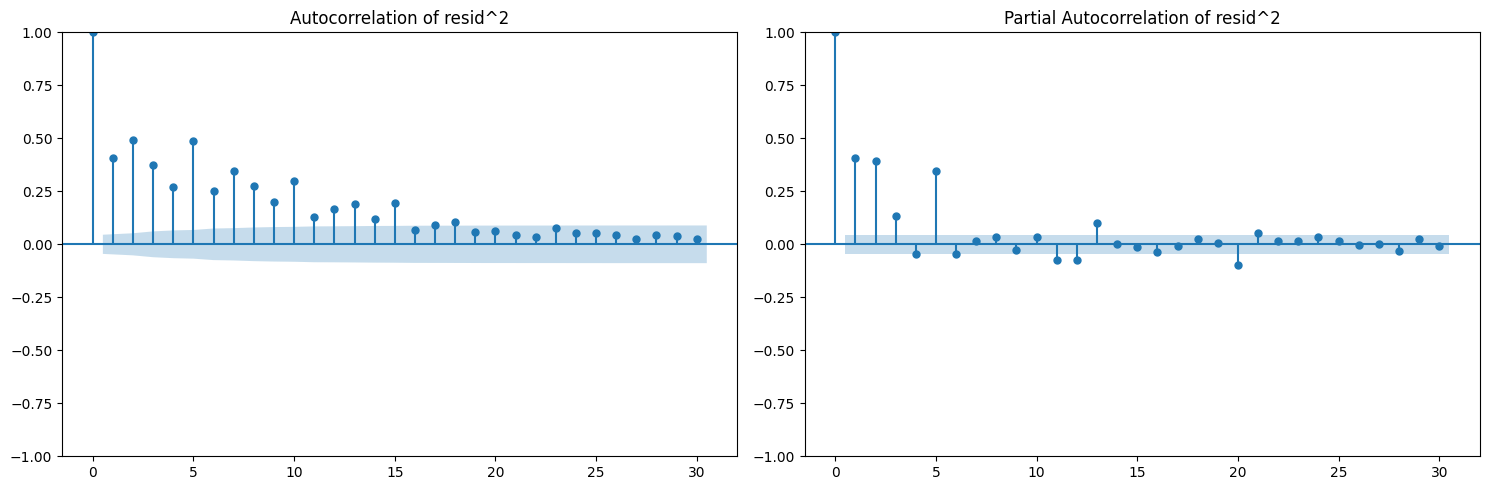

In [63]:
plot_autocorrelations(['resid^2'], [garch_1_1_t.resid ** 2])

Check the skewt distribution of the standardized residuals

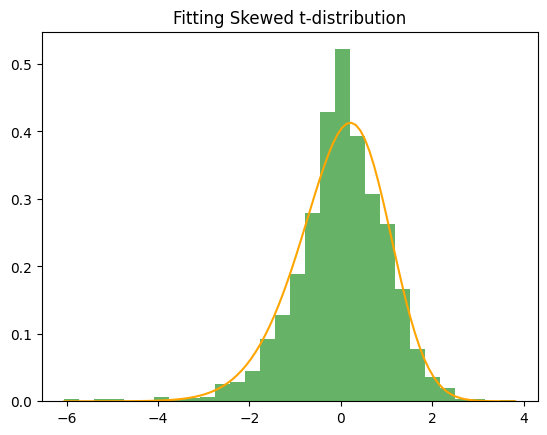

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Assuming 'data' is your data
data = std_resid  # replace this with your data

# Fit a skewed t-distribution to the data
a, loc, scale = skewnorm.fit(data)

# Generate a range of values between the min and max of your data
x = np.linspace(min(data), max(data), 100)

# Calculate the PDF of the fitted distribution
pdf = skewnorm.pdf(x, a, loc, scale)

# Plot the histogram of your data and the PDF of the fitted distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, pdf, 'orange')
plt.title('Fitting Skewed t-distribution')
plt.show()

Forecasting volatility

In [65]:
from vol_models import GARCHModel

GARCH forecasting

In [66]:
import numpy as np
from arch import arch_model
from tqdm import tqdm


def forecast_volatility_with_GARCH(train, validation, dates, window_size, horizon, model):
    # Create lists to store the predictions, actual values and prediction dates
    predictions = []
    prediction_dates = []
    params = []

    # Perform rolling window validation
    for i in tqdm(range(window_size, len(train) + len(validation), horizon)):
        if i < len(train):
            train_temp = train[:i]
        else:
            train_temp = returns[i - window_size:i]
        model.fit_garch_model(train_temp, disp='off')
        pred = model.forecast(horizon=horizon)
        predictions.extend(pred.variance.values[-1, :] ** 0.5)
        # Add the corresponding dates to the prediction_dates list
        prediction_dates.extend(dates[i:i+horizon])
        params.append(model.result.params)

    predictions = predictions[:len(validation)]
    prediction_dates = prediction_dates[:len(validation)]

    return predictions, prediction_dates, params


In [67]:
import warnings
from scipy.optimize import OptimizeWarning

warnings.filterwarnings(action='ignore', category=OptimizeWarning)

In [69]:
def calculate_r_square(real, prediction):
    return 1 - np.sum((real - prediction) ** 2) / np.sum((real - np.mean(real)) ** 2)

In [ ]:
def calculate_adjusted_r_square(real, predictions, p):
    n = len(real)
    return 1 - (1 - calculate_r_square(real, predictions)) * (n - 1) / (n - p - 1)

In [136]:
from sklearn.metrics import mean_squared_error

# Assuming 'daily_data' is your DataFrame and 'residuals*100' is the column you want to model
residuals = (daily_data['ARIMA_res']).values

# Get the dates from the DataFrame
dates = daily_data.index.values

# Split the data into training, validation and testing sets
train_size = int(len(residuals) * 8 / 9)
train, validation= residuals[:train_size], residuals[train_size:],

real_volatility_validation = daily_data['rv5'].values[train_size:]


# Define the initial window size and the forecast horizon
window_size = len(train)  # Adjust as needed
horizon = 1  # Adjust as needed

p_values = range(1, 2)
q_values = range(1, 2)

best_r_square = -np.inf
best_param_r_square = None
best_mse = np.inf
best_param_mse = None
best_mae = np.inf
best_param_mae = None
# Define the distributions
# distributions = ['normal', 't', 'skewt']
distributions = ['skewt']
for dist in distributions:
    for p in p_values:
        for q in q_values:
            # Fit the GARCH model
            garch_model = GARCHModel(p,q, dist = dist)
            predictions, prediction_dates, params = forecast_volatility_with_GARCH(train, validation, dates, window_size, horizon, garch_model)
            predictions = [x for x in predictions]
            # RMSE error
            rmse =  mean_squared_error(real_volatility_validation, predictions) ** 0.5
            mae = np.mean(np.abs(real_volatility_validation - predictions))
            r_square = calculate_r_square(real_volatility_validation, predictions)
            print(f"MSE for GARCH({p},{q}) with {dist} distribution: {rmse}")
            print(f"MAE for GARCH({p},{q}) with {dist} distribution: {mae}")
            print(f"R^2 for GARCH({p},{q}) with {dist} distribution: {r_square}")
            if rmse < best_mse:
                best_mse = rmse
                best_param_mse = (p, q, dist)
            if mae < best_mae:
                best_mae = mae
                best_param_mae = (p, q, dist)
            if r_square > best_r_square:
                best_r_square = r_square
                best_param_r_square = (p, q, dist)

print(f"Best MSE model: GARCH{best_param_mse} with RMSE={best_mse}")
print(f"Best MAE model: GARCH{best_param_mae} with MAE={best_mae}")
print(f"Best R^2 model: GARCH{best_param_r_square} with R^2={best_r_square}")



100%|██████████| 209/209 [00:23<00:00,  8.94it/s]

MSE for GARCH(1,1) with skewt distribution: 0.0027968532023917476
MAE for GARCH(1,1) with skewt distribution: 0.002238533856572491
R^2 for GARCH(1,1) with skewt distribution: -0.009755897174979156
Best MSE model: GARCH(1, 1, 'skewt') with RMSE=0.0027968532023917476
Best MAE model: GARCH(1, 1, 'skewt') with MAE=0.002238533856572491
Best R^2 model: GARCH(1, 1, 'skewt') with R^2=-0.009755897174979156


In [ ]:
# TODO: adjusted r-squared for GARCH

Best model

In [72]:
garch_model = GARCHModel(1,1, dist = 'skewt')
predictions, prediction_dates, params = forecast_volatility_with_GARCH(train, validation, dates, window_size, horizon, garch_model)

100%|██████████| 209/209 [00:28<00:00,  7.30it/s]


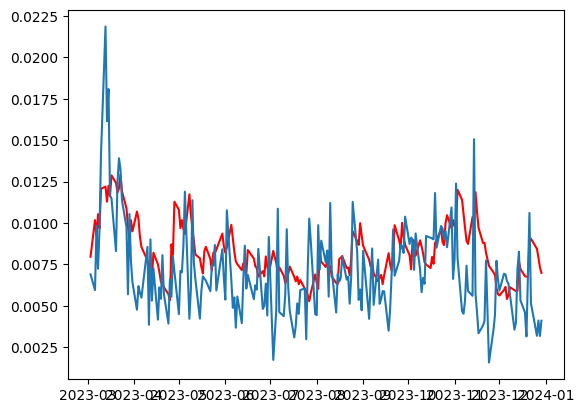

In [73]:
plt.plot(prediction_dates, predictions, label='Predicted Volatility', color = 'r')
plt.plot(prediction_dates, real_volatility_validation, label='Real Volatility')

VAR models

Stationarity Test

In [94]:
for column in data.columns:
    print(column)
    stationarity_test(data[column])

rv5
ADF Statistic: -5.506782
p-value: 0.000002
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
return
ADF Statistic: -12.820992
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADS
ADF Statistic: -5.162393
p-value: 0.000010
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
USEPUINDXD
ADF Statistic: -3.695521
p-value: 0.004177
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
VIX
ADF Statistic: -4.470758
p-value: 0.000222
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
13wb_return
ADF Statistic: -8.674221
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
credit_spread
ADF Statistic: -0.236199
p-value: 0.934067
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
dollar_index_return
ADF Statistic: -40.036553
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Volume
ADF Statistic: -3.768654
p-value: 0.003245
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [95]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming 'data' is your DataFrame
maxlag = 12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in ['rv5']:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],10) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns, verbose=True)

Y = rv5, X = rv5, P Values = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Y = return, X = rv5, P Values = [0.8720203255, 6e-10, 2.8e-09, 2e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Y = ADS, X = rv5, P Values = [0.0, 0.0, 1e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Y = USEPUINDXD, X = rv5, P Values = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Y = VIX, X = rv5, P Values = [0.173000047, 3e-10, 8.1e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Y = 13wb_return, X = rv5, P Values = [0.0020843311, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Y = credit_spread, X = rv5, P Values = [0.0013656127, 0.004006935, 0.0033367329, 0.0012817524, 1e-10, 3e-10, 2e-10, 0.0, 0.0, 0.0, 0.0, 0.0]
Y = dollar_index_return, X = rv5, P Values = [0.0029184345, 0.0047106527, 0.010172074, 0.0101024185, 8.59625e-05, 3.41587e-05, 7.89358e-05, 0.0002024202, 0.0001437081, 0.0001403713, 9.17652e-05, 0.0001985759]
Y = Volume, X = rv5, P Values = [0.0, 0.0, 0.0, 0.

,rv5_x,return_x,ADS_x,USEPUINDXD_x,VIX_x,13wb_return_x,credit_spread_x,dollar_index_return_x,Volume_x
rv5_y,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return_y,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADS_y,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USEPUINDXD_y,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VIX_y,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13wb_return_y,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
credit_spread_y,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dollar_index_return_y,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Volume_y,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
data.drop(['return'], axis = 1, inplace = True)

In [168]:
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame
scaler = MinMaxScaler()
# Fit the scaler to the DataFrame and transform it

# Assuming 'data' is your DataFrame
# Split the data into training, validation, and testing sets
train_data = data.iloc[:-int(len(data) * 1/9)]
valid_data = data.iloc[-int(len(data) * 1/9):]


train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns, index=train_data.index)
valid_data_scaled = pd.DataFrame(scaler.transform(valid_data), columns=valid_data.columns, index=valid_data.index)

# Define the range of values for the order
max_order = 10
steps = 30
# Initialize variables to store the best results
best_bic = float('inf')
best_aic = float('inf')
best_mse = float('inf')
best_mae = float('inf')
best_order_bic = None
best_order_aic = None
best_order_mse = None
best_order_mae = None

model = VAR(train_data_scaled)

# Iterate over all orders
for i in range(1, max_order+1):
    # Fit the VAR model
    result = model.fit(i)

    # Update the best BIC model
    if result.bic < best_bic:
        best_bic = result.bic
        best_order_bic = i

    # Update the best AIC model
    if result.aic < best_aic:
        best_aic = result.aic
        best_order_aic = i
    
        
    forecast_scaled = result.forecast(train_data_scaled.values[-i:], steps=steps)
    # Calculate the MSE
    mse = mean_squared_error(valid_data_scaled.iloc[:steps], forecast_scaled)
    mae = np.mean(np.abs(valid_data_scaled.iloc[:steps] - forecast_scaled))
    
        # Update the best model
    if mse < best_mse:
        best_mse = mse
        best_order_mse = i



    
    # print(f"Order {i} fitted")
    # print("BIC: ", result.bic)
    # print("AIC: ", result.aic)

print(f"Best MSE model: VAR({best_order_mse}) with MSE={best_mse}")
# Print the best models
print(f"Best BIC model: VAR({best_order_bic}) with BIC={best_bic}")
print(f"Best AIC model: VAR({best_order_aic}) with AIC={best_aic}")

Best MSE model: VAR(9) with MSE=0.008242962076429678
Best BIC model: VAR(6) with BIC=-61.78467320060463
Best AIC model: VAR(10) with AIC=-63.86140748479809


In [124]:
model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,29.39,29.42,5.813e+12,29.40
1,15.11,15.36,3.633e+06,15.20
2,14.26,14.74,1.553e+06,14.44
3,13.95,14.66,1.147e+06,14.22
4,13.75,14.69,9.375e+05,14.10
5,13.59,14.76,8.005e+05,14.03
6,12.83,14.22*,3.720e+05,13.35
7,12.74,14.36,3.406e+05,13.34*
8,12.68,14.53,3.210e+05,13.37
9,12.57*,14.65,2.887e+05*,13.35


In [150]:
model = VAR(train_data)
results = model.fit(10)

In [142]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, May, 2024
Time:                     10:53:29
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    15.3510
Nobs:                     1502.00    HQIC:                   15.1912
Log likelihood:          -28315.3    FPE:                3.59932e+06
AIC:                      15.0963    Det(Omega_mle):     3.43134e+06
--------------------------------------------------------------------
Results for equation rv5
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         -0.003447         0.000556           -6.195           0.000
L1.rv5                         0.388474         0.029380           13.222           0.000
L1.ADS                    

In [151]:
lags = results.k_ar
lags

10

In [152]:
from tqdm import tqdm

In [153]:
len(daily_data)

1877

In [154]:
len(data)

1690

In [169]:
from statsmodels.tsa.api import VAR
import numpy as np

# Assuming 'data' is your DataFrame
# Define the initial window size and the forecast horizon
window_size = len(train_data)  # Adjust as needed
horizon = 1  # Adjust as needed


scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)


# Initialize a list to store the predictions
predictions = []

# Perform rolling window prediction
for i in tqdm(range(window_size, len(data))):
    # Get the training data for this window
    train_scaled = data_scaled.iloc[i-window_size:i]

    # Fit the VAR model
    model = VAR(train_scaled)
    results = model.fit(lags)  # Fit the model with 10 lags

    # Make a prediction
    pred = results.forecast(train_scaled.values[-lags:], steps=horizon)

    # Store the prediction
    predictions.append(pred[0])

# Convert the predictions list to a numpy array
forecast = np.array(scaler.inverse_transform(predictions))

100%|██████████| 187/187 [00:06<00:00, 27.83it/s]


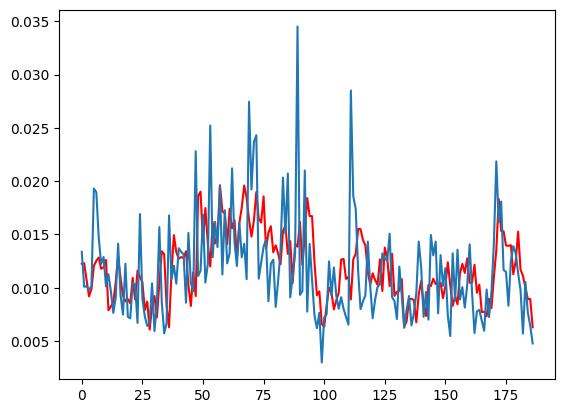

In [172]:
plt.plot(forecast[:,0], color = 'r')
plt.plot(data['rv5'].iloc[window_size:].values)

In [171]:
mse = mean_squared_error(data['rv5'].iloc[window_size:], forecast[:,0]) ** 0.5
mae = np.mean(np.abs(data['rv5'].iloc[window_size:] - forecast[:,0]))
r_2 = calculate_r_square(data['rv5'].iloc[window_size:], forecast[:,0])
print(f"MSE for VAR: {mse}")
print(f"MAE for VAR: {mae}")
print(f"R^2 for VAR: {r_2}")

MSE for VAR: 0.004512120084813223
MAE for VAR: 0.0033395074850041707
R^2 for VAR: 0.08125594280879145
